# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [3]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(0.5,0.5)])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

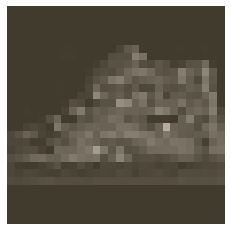

In [4]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [8]:
# TODO: Define your network architecture here
class fashion_network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 255)
        self.fc2 = nn.Linear(255, 200)
        self.fc3 = nn.Linear(200, 50)
        self.fc4 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.softmax(x, dim=1)

        return x

model = fashion_network()
model

# 2nd method
# feed forward network
input_size = 784
hidden_sizes = [255, 200, 50]
output_size = 10

modelx = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size),
                      nn.Softmax(dim=1))

print(model)
print(modelx)

fashion_network(
  (fc1): Linear(in_features=784, out_features=255, bias=True)
  (fc2): Linear(in_features=255, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=10, bias=True)
)
Sequential(
  (0): Linear(in_features=784, out_features=255, bias=True)
  (1): ReLU()
  (2): Linear(in_features=255, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=50, bias=True)
  (5): ReLU()
  (6): Linear(in_features=50, out_features=10, bias=True)
  (7): Softmax(dim=1)
)


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [9]:
# TODO: Create the network, define the criterion and optimizer
model = fashion_network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.3)

In [10]:
# TODO: Train the network here
# TODO: Train the network here
# print('Initial weights ', model.fc1.weight)
# images, labels = next(iter(trainloader))
# images.resize_(64, 784)

# optimizer.zero_grad()

# output = model.forward(images)
# loss = criterion(output, labels)
# loss.backward()
# print('Gradient -> ', model.fc1.weight.grad)
# optimizer.step()
# print('updated weights', model.fc1.weight)

epochs = 5 # How many times we will go through the entire dataset
print_every = 50 # Self explanatory
steps = 0 # Step counter

for epoch in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1 # count steps
        # Resize the image
        images.resize_(images.shape[0], 784)

        # Reset optimizer
        optimizer.zero_grad()

        output = model.forward(images)
        loss = criterion(output, labels) # calculates the error gets a scalar vector
        loss.backward() # backprogataes
        optimizer.step() # Recalculates the gradient

        running_loss += loss.item() # Since loss is a scalar vector we need to get the one value that it contains

        # Print at the end
        if steps % print_every:
            print("Epoch: {}/{}... ".format(epoch+1, epochs),
                  "Loss:  {:.4f}".format(running_loss/print_every))

            running_loss = 0


/home/amaru-razerblade/Documents/Computer Vision Udacity/cv_env/lib/python3.7/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0461
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0461
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0459
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0460
Epoch: 1/5...  Loss:  0.0459
Epoch: 1/5...  Loss:  0.0459
Epoch: 1/5...  Loss:  0.0459
Epoch: 1/5...  Loss:  0.0459
Epoch: 1/5...  Loss:  0.0459
Epoch: 1/5...  Loss:  0.0459
Epoch: 1/5...  Loss:  0.0459
Epoch: 1/5...  Loss:  0.0459
Epoch: 1/5...  Loss:  0.0459
Epoch: 1/5... 

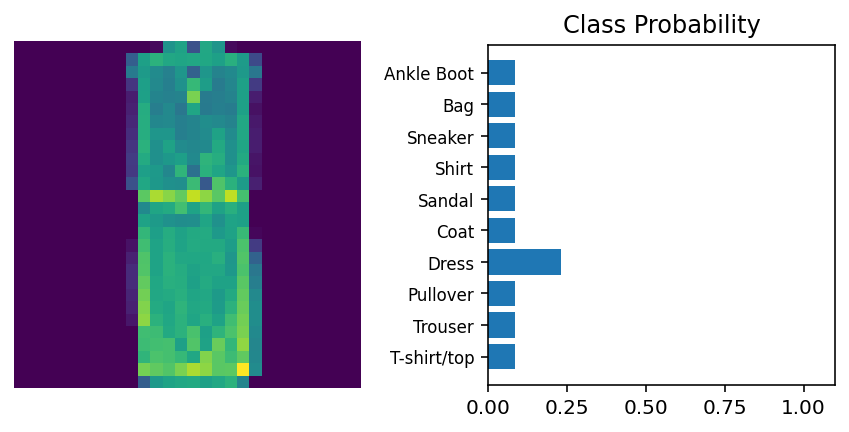

In [14]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logits = model.forward(img)

ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.